##Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Read dataset

In [5]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
print(df.shape)

(7043, 21)


In [9]:
print(df.size)

147903


In [10]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


##Clean data

In [11]:
df.drop('customerID',axis=1,inplace=True)

In [12]:
print(df.size)

140860


In [13]:
df.dropna(inplace=True)

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

##Categorical Variables

In [15]:
cat_cols = df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include='number').columns

In [16]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [17]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


##EDA

Churn Distribution


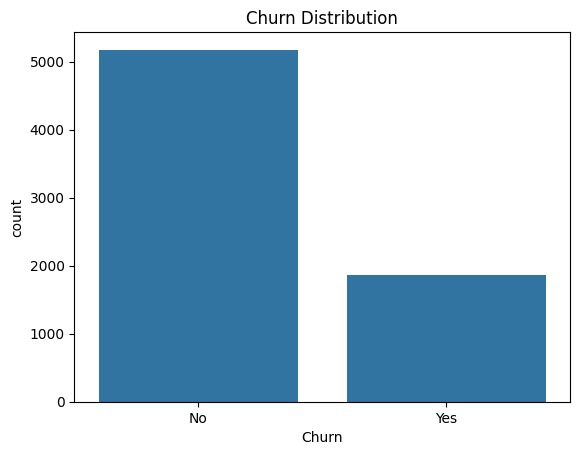

In [18]:
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

Monthly charges vs churn


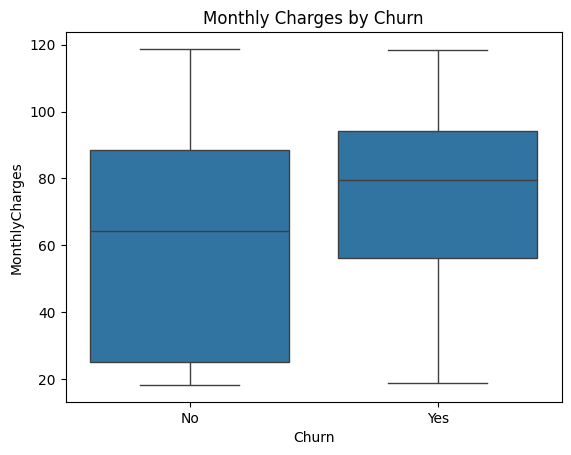

In [19]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title('Monthly Charges by Churn')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x = df_encoded.drop('Churn_Yes',axis=1)
y=df_encoded['Churn_Yes']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##Model Training

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Accuracy:  0.7920511000709723
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.87      1036
        True       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



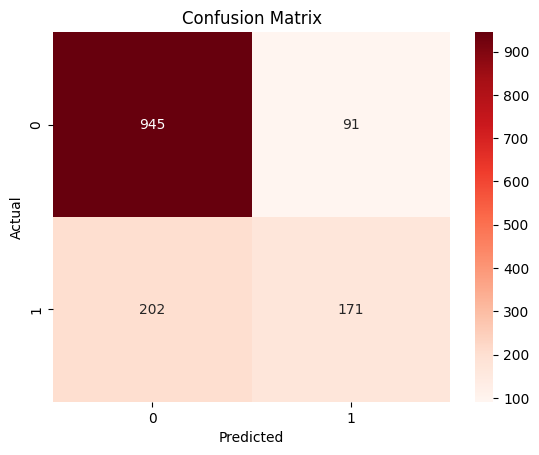

In [23]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Top 10 Features

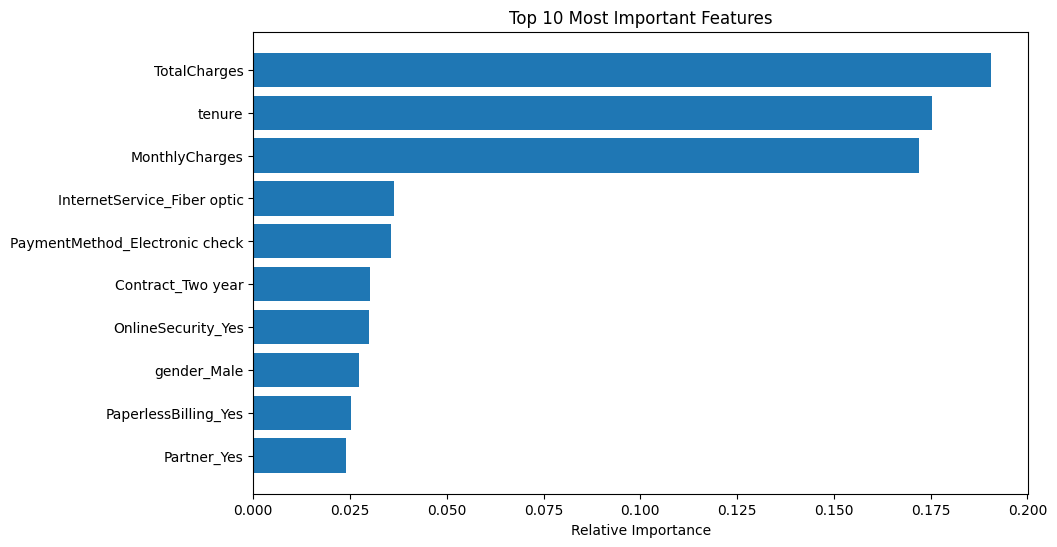

In [24]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
features = x_train.columns[indices]
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')
plt.title('Top 10 Most Important Features')
plt.show()

##Online Security is present

In [26]:
df_online = df[df['OnlineSecurity'] == 'Yes']
print(df_online.size)

40380


##Internet things types

In [28]:
df_internet = df[df['InternetService'] == 'Fiber optic']
df_service = df[df['InternetService'] == 'DSL']
print("Fiber Optic:",df_internet.size)
print("DSL:",df_service.size)

Fiber Optic: 61920
DSL: 48420


##Contract types

In [29]:
df_month = df[df['Contract'] == 'Month-to-month']
df_year = df[df['Contract'] == 'One year']
df_two = df[df['Contract'] == 'Two year']
print("Month-to-month:",df_month.size)
print("One year:",df_year.size)
print("Two year:",df_two.size)

Month-to-month: 77500
One year: 29460
Two year: 33900


##Total users having access to everything

In [31]:
df_all = df[(df['OnlineSecurity'] == 'Yes') & (df['OnlineBackup'] == 'Yes') & (df['DeviceProtection'] == 'Yes') & (df['TechSupport'] == 'Yes') & (df['StreamingTV'] == 'Yes') & (df['StreamingMovies'] == 'Yes') & (df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic')]
print("Users with all provisions: ",df_all.size)
df_female = df_all[df_all['gender'] == 'Female']
print("Female users with all provisions: ",df_female.size)
df_male = df_all[df_all['gender'] == 'Male']
print("Male users with all provisions: ",df_male.size)

Users with all provisions:  160
Female users with all provisions:  80
Male users with all provisions:  80


##Total users with no provision

In [33]:
df_none = df[(df['OnlineSecurity'] == 'No') & (df['OnlineBackup'] == 'No') & (df['DeviceProtection'] == 'No') & (df['TechSupport'] == 'No') & (df['StreamingTV'] == 'No') & (df['StreamingMovies'] == 'No') & (df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic')]
print("Users with no provisions: ",df_none.size)

Users with no provisions:  7820
